In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

In [3]:
directory = "D:/Proiect2/cnrpark_dataset/A"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=['busy', 'free'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

print(train_ds)

Found 12584 files belonging to 2 classes.
Using 10068 files for training.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=['busy', 'free'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

print(test_ds)

Found 12584 files belonging to 2 classes.
Using 2516 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
for image_batch, labels_batch in train_ds:
    print("Image shape for train: ", image_batch.shape)
    print("Label shape for train: ", labels_batch.shape)
    
    break

for image_batch, labels_batch in test_ds:
    print("Image shape for test: ", image_batch.shape)
    print("Label shape for test: ", labels_batch.shape)
    
    break

Image shape for train:  (32, 256, 256, 3)
Label shape for train:  (32,)
Image shape for test:  (32, 256, 256, 3)
Label shape for test:  (32,)


In [6]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),  
    layers.RandomRotation(0.1),       
    layers.RandomZoom(0.1),     
    layers.RandomContrast(0.1)       
])

model = Sequential([
    data_augmentation,  
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    
    # Conv Block 1
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Conv Block 2
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Conv Block 3
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Conv Block 4
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

d:\Proiect2\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# best_model_checkpoint = ModelCheckpoint(
#     filepath='best_model.keras',    
#     monitor='val_loss',          
#     save_best_only=True,        
#     mode='min',                
#     verbose=1
# )

# last_model_checkpoint = ModelCheckpoint(
#     filepath='last_model.keras',    
#     monitor='epoch',             
#     save_best_only=False,        
#     verbose=1
# )

model.build(input_shape=(None, 256, 256, 3))
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,041 (449.38 KB)

 Trainable params: 114,561 (447.50 KB)

 Non-trainable params: 480 (1.88 KB)

In [91]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.8860 - loss: 0.2798 - val_accuracy: 0.3486 - val_loss: 1.8744
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.9312 - loss: 0.1799 - val_accuracy: 0.9217 - val_loss: 0.1954
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.9443 - loss: 0.1436 - val_accuracy: 0.9416 - val_loss: 0.1595
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.9569 - loss: 0.1166 - val_accuracy: 0.8510 - val_loss: 0.3272
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 425s 1s/step - accuracy: 0.9586 - loss: 0.1169 - val_accuracy: 0.9094 - val_loss: 0.2254
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.9559 - loss: 0.1141 - val_accuracy: 0.8482 - val_loss: 0.2871
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.9614 - loss: 0.1053 - val_accuracy: 0.7560 - val_loss: 0.7111
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.9649 - loss: 0.0923 - val_accu

79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 242ms/step - accuracy: 0.9786 - loss: 0.0509
Test Loss: 0.049168702214956284, Test Accuracy: 0.9809221029281616
Class names are: ['busy', 'free']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


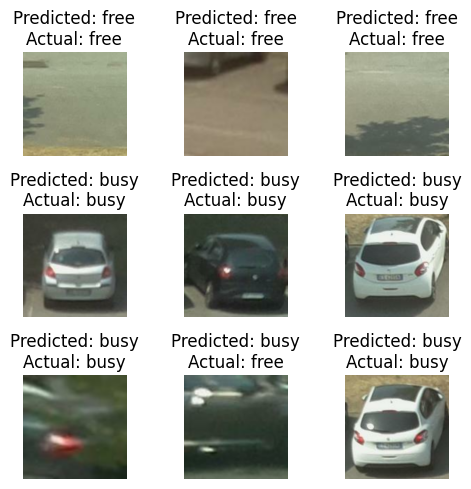

In [8]:
best_model = load_model('best_model.keras')
loss, acc = best_model.evaluate(test_ds)
print(f"Test Loss: {loss}, Test Accuracy: {acc}")

class_names = test_ds.class_names  
print(f"Class names are: {class_names}")

# Get a batch of images and labels from the test dataset
for images, labels in test_ds.take(1):  
    predictions = best_model.predict(images) 
    predictions = np.squeeze(predictions)  
    
    # Convert probabilities to binary predictions
    predicted_classes = (predictions > 0.5).astype(int)  
    
    # Display images with predicted and true labels
    plt.figure(figsize=(5, 5))
    for i in range(min(9, len(images))):  
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[int(labels[i])]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()